# Stop The Count or Count The Vote?
## Chris Tralie

We have groups of Trump supporters in Phoenix, Arizona chanting "count the vote," while simultaneous groups of Trump supporters are chanting "stop the count" in Detroit, Michigan.  Obviously, all votes should be counted, but this shows how the moral and democratic stance of many Americans across the political spectrum is flexible depending on the circumstances of the "tribe" that they belong to.  To highlight this, I used dynamic time warping to align audio clips from each demonstration.  I've put the Detroit "stop the count" protestors in the right ear, while the Phoenix "count the vote" protests are in the left ear.  The code below shows how to accomplish this using the linmdtw and librosa libraries.

In [1]:
import linmdtw
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import IPython.display as ipd
import time
import librosa

sr = 44100
x0_0, sr = linmdtw.load_audio("Count5Slow.mp4", sr)
x0_1, sr = linmdtw.load_audio("Stop5.mp4", sr)

## Step 1: Align The Audio

In [2]:
hop_length = 512
wins_per_block = 20
X0_0 = librosa.feature.mfcc(y=x0_0, sr=sr)
X0_1 = librosa.feature.mfcc(y=x0_1, sr=sr)
X0_0 = librosa.feature.stack_memory(X0_0, n_steps=wins_per_block, mode='edge').T
X0_1 = librosa.feature.stack_memory(X0_1, n_steps=wins_per_block, mode='edge').T

metadata = {'totalCells':0, 'M':X0_0.shape[0], 'N':X0_1.shape[0], 
            'timeStart':time.time(), 'perc':10}
path0 = linmdtw.linmdtw(X0_0, X0_1, do_gpu=True, metadata=metadata)

Parallel Alignment 10.0% Elapsed time: 0.315
Parallel Alignment 20.0% Elapsed time: 0.332
Parallel Alignment 30.0% Elapsed time: 0.488
Parallel Alignment 40.0% Elapsed time: 0.507
Parallel Alignment 50.0% Elapsed time: 0.521


<IPython.core.display.Javascript object>


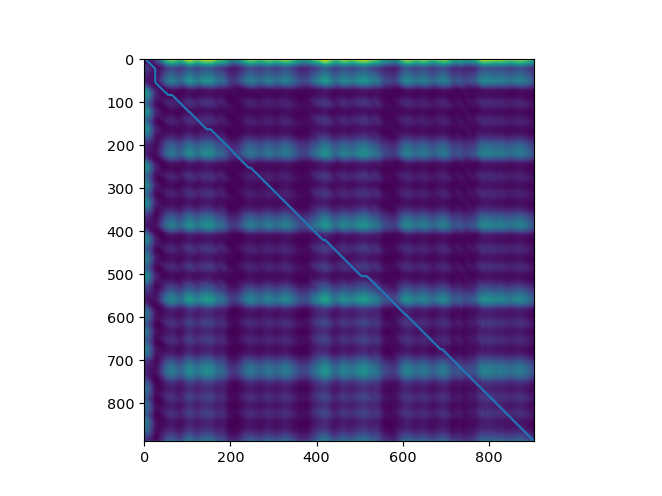

In [3]:
XSqr = np.sum(X0_0**2, 1)
YSqr = np.sum(X0_1**2, 1)
D = XSqr[:, None] + YSqr[None, :] - 2*X0_0.dot(X0_1.T)
plt.imshow(D)
plt.plot(path0[:, 1], path0[:, 0])

In [4]:
xsync0 = linmdtw.stretch_audio(x0_0, x0_1, sr, path0, hop_length)
linmdtw.save_audio(xsync0[0:sr*30, ::], sr, "sync")
ipd.Audio("sync.mp3")

Stretching...
